## Helper Functions

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt



def generate_time_series_plot(ax, df, x='frame_no', y_list=['lidar_validation_height', 'cnn_rnn_prediction'], color_list=['green', 'red'], ylabel='Cloud Top Height (m)', title='Time-Series Plot', grid=False, ylabel_list=None):
    """
    Generate a time-series plot with multiple y-axes.
    Args:
        ax (matplotlib.axes.Axes): The axes object to plot on.
        df (pandas.DataFrame): The DataFrame containing the data.
        x (str): The name of the column to use as the x-axis.
        y_list (list): A list of column names to plot on the y-axes.
        color_list (list): A list of colors to use for each y-axis.
        ylabel (str): The label for the y-axis.
        title (str): The title of the plot.
        grid (bool): Whether to display a grid on the plot.
        ylabel_list (list): A list of labels for each y-axis.
    Returns:
        matplotlib.axes.Axes: The updated axes object.
    """
    for i, y in enumerate(y_list):
        label = ylabel_list[i] if ylabel_list else y
        ax.plot(df[x], df[y], label=label, color=color_list[i], linewidth=2)
        mean_y = df[y].mean()
        ax.axhline(mean_y, color=color_list[i], linestyle='--', linewidth=1.5, label=f"Mean {label}")

    ax.set_xlabel("FEGS Video Frame Number", fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.legend(fontsize=10)
    if grid:
        ax.grid(True)
    return ax


def generate_freq_distn(ax, df, attribute, title='Frequency Distribution', grid=False):
    """
    Generate a frequency distribution plot for a given attribute.
    Args:
        ax (matplotlib.axes.Axes): The axes object to plot on.
        df (pandas.DataFrame): The DataFrame containing the data.
        attribute (str): The name of the column to plot.
        title (str): The title of the plot.
        grid (bool): Whether to display a grid on the plot.
    Returns:
        matplotlib.axes.Axes: The updated axes object.
    """
    ax.hist(df[attribute], bins=5, color='blue', alpha=0.7, edgecolor='black')
    ax.axvline(df[attribute].mean(), color='red', linestyle='--', label='Mean')
    ax.axvline(df[attribute].median(), color='green', linestyle='--', label='Median')

    ax.set_xlabel('Absolute Difference in Actual vs Predicted Height (m)', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.legend(fontsize=10)
    if grid:
        ax.grid(True)
    return ax


def generate_residual_plot(ax, df, x='frame_no', y='lidar_nn_df', title='Residuals Over Time', grid=False):
    """
    Generate a plot of residuals over time.
    Args:
        ax (matplotlib.axes.Axes): The axes object to plot on.
        df (pandas.DataFrame): The DataFrame containing the data.
        x (str): The name of the column to use as the x-axis.
        y (str): The name of the column to use as the y-axis.
        title (str): The title of the plot.
        grid (bool): Whether to display a grid on the plot.
    Returns:
        matplotlib.axes.Axes: The updated axes object.
    """
    ax.plot(df[x], df[y], label=f"Residual Height", color='orange', linewidth=2)
    ax.axhline(0, color='red', linestyle='--', label='Zero Residual')

    ax.set_xlabel('FEGS Video Frame Number', fontsize=12)
    ax.set_ylabel('Residual Height (m)', fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.legend(fontsize=10)
    if grid:
        ax.grid(True)
    return ax


def generate_scatter_plot(ax, df, x='lidar_validation_height', y='cnn_rnn_prediction', title='Actual vs Predicted Heights', grid=False, xlabel='Lidar Vailidation Height', ylabel='CNN RNN Prediction'):
    """
    Generate a scatter plot of actual vs predicted heights.
    Args:
        ax (matplotlib.axes.Axes): The axes object to plot on.
        df (pandas.DataFrame): The DataFrame containing the data.
        x (str): The name of the column to use as the x-axis.
        y (str): The name of the column to use as the y-axis.
        title (str): The title of the plot.
        grid (bool): Whether to display a grid on the plot.
        xlabel (str): The label for the x-axis.
        ylabel (str): The label for the y-axis.
    Returns:
        matplotlib.axes.Axes: The updated axes object.
    """
    ax.scatter(df[x], df[y], alpha=0.7, color='purple', edgecolor='k', s=50)
    max_val = max(df[x].max(), df[y].max())
    min_val = min(df[x].min(), df[y].min())
    ax.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.legend(fontsize=10)
    if grid:
        ax.grid(True)
    return ax


def generate_box_plot(ax, df, attribute='lidar_nn_df', title='Box Plot', grid=False):
    """
    Generate a box plot for a given attribute.
    Args:
        ax (matplotlib.axes.Axes): The axes object to plot on.
        df (pandas.DataFrame): The DataFrame containing the data.
        attribute (str): The name of the column to plot.
        title (str): The title of the plot.
        grid (bool): Whether to display a grid on the plot.
    Returns:
        matplotlib.axes.Axes: The updated axes object.
    """
    ax.boxplot(df[attribute], vert=False, patch_artist=True, boxprops=dict(facecolor='cyan', color='black'))
    ax.set_xlabel('Absolute Difference in Actual vs Predicted Height (m)', fontsize=12)
    ax.set_title(title, fontsize=14)
    if grid:
        ax.grid(True)
    return ax


def create_combined_plot(df, titles, diff_attr, y_attr, ylabel):
    """
    Create a combined plot with multiple subplots.
    Args:
        df (pandas.DataFrame): The DataFrame containing the data.
        titles (dict): A dictionary of plot titles.
        diff_attr (str): The name of the column to use as the y-axis.
        y_attr (str): The name of the column to use as the y-axis.
        ylabel (str): The label for the y-axis.
    Returns:
        None
    """
    fig, axs = plt.subplots(3, 2, figsize=(20, 20))
    generate_time_series_plot(axs[0, 0], df, title=titles['ts'], y_list=['lidar_validation_height', y_attr], ylabel_list=["LiDAR Validation Height (m)", ylabel])
    generate_freq_distn(axs[0, 1], df, attribute=diff_attr, title=titles['fd'])
    generate_residual_plot(axs[1, 0], df, title=titles['res'], y=diff_attr)
    generate_scatter_plot(axs[1, 1], df, title=titles['scatter'], xlabel='LiDAR Validation Height (m)', y=y_attr, ylabel=ylabel)
    generate_box_plot(axs[2, 0], df, attribute=diff_attr, title=titles['box'])
    generate_time_series_plot(axs[2, 1], df, title=titles['rolling'], y_list=['rolling_actual', 'rolling_predicted'], ylabel_list=["LiDAR Validation Height Rolling Mean", f"{ylabel}  Rolling Mean"])
    plt.tight_layout()
    plt.show()


def print_error_metrics(df, y='lidar_validation_height', yhat='cnn_rnn_prediction'):
    """
    Print the error metrics for a given DataFrame.
    Args:
        df (pandas.DataFrame): The DataFrame containing the data.
        y (str): The name of the column to use as the y-axis.
        yhat (str): The name of the column to use as the y-axis.
    Returns:
        None
    """
    mae = mean_absolute_error(df[y], df[yhat])
    mse = mean_squared_error(df[y], df[yhat])
    rmse = np.sqrt(mse)
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    return


## Generating time-series analysis charts

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/harvard.dce.nasa.cloud2cloud

Mounted at /content/drive
/content/drive/MyDrive/harvard.dce.nasa.cloud2cloud


In [ ]:

import pandas as pd
cnn_rnn_df = pd.read_csv('test_predictions_df.csv')
# cnn_rnn_df = pd.read_csv('test_predictions_df-2.csv')
# df2 = pd.read_csv('tvl1__output_170418_175706_183328_frames.csv')
tvl1_df = pd.read_csv('Center_Points_TV_L1.csv')
lk_df = pd.read_csv('20241209_063131_LK_output_height_min_max_mean_48_48_fisheye_corrected.csv')
print(cnn_rnn_df.shape)
print(tvl1_df.shape)
print(lk_df.shape)

(432, 3)
(432, 35)
(295, 5)


In [ ]:
lk_df = lk_df.rename(columns={'Frame_Number': 'frame_no', 'Height': 'lk_estimation_max', 'Height.1': 'lk_estimation_min', 'Height.2': 'lk_estimation', 'True_Lidar_Height': 'lidar_validation_height'})
cnn_rnn_df = cnn_rnn_df.rename(columns={'Actuals': 'lidar_validation_height', 'Predictions': 'cnn_rnn_prediction', 'Timestamps': 'timestamp'})
tvl1_df = tvl1_df.rename(columns={'Unnamed: 0': 'frame_no', 'validation_height': 'lidar_validation_height', 'Estimated height': 'tv_l1_estimation'})

lk_df = lk_df.drop(index=0)

lk_df['lk_estimation_max'] = lk_df['lk_estimation_max'].astype(float)
lk_df['lk_estimation_min'] = lk_df['lk_estimation_min'].astype(float)
lk_df['lk_estimation'] = lk_df['lk_estimation'].astype(float)
lk_df['lidar_validation_height'] = lk_df['lidar_validation_height'].astype(float)
lk_df['lidar_lk_diff'] = abs(lk_df['lidar_validation_height'] - lk_df['lk_estimation'])

cnn_rnn_df = cnn_rnn_df.sort_values(by='timestamp').reset_index(drop=True)
tvl1_df = tvl1_df.sort_values(by='frame_no')
lk_df = lk_df.sort_values(by='frame_no')

cnn_rnn_df['frame_no'] = tvl1_df['frame_no']

cnn_rnn_df['lidar_nn_diff'] = abs(cnn_rnn_df['lidar_validation_height'] - cnn_rnn_df['cnn_rnn_prediction'])
tvl1_df['lidar_tvl1_diff'] = abs(tvl1_df['lidar_validation_height'] - tvl1_df['tv_l1_estimation'])
lk_df['lidar_lk_diff'] = abs(lk_df['lidar_validation_height'] - lk_df['lk_estimation'])


cnn_rnn_df['rolling_actual'] = cnn_rnn_df['lidar_validation_height'].rolling(window=5).mean()
cnn_rnn_df['rolling_predicted'] = cnn_rnn_df['cnn_rnn_prediction'].rolling(window=5).mean()

print(cnn_rnn_df.shape)
print(tvl1_df.shape)
print(lk_df.shape)

lk_df = lk_df[lk_df['lk_estimation'] >= 0].reset_index(drop=True)
lk_df = lk_df[lk_df['lk_estimation_min'] >= 0].reset_index(drop=True)
lk_df = lk_df[lk_df['lk_estimation_max'] >= 0].reset_index(drop=True)
lk_df = lk_df[lk_df['lk_estimation'] >= 10000].reset_index(drop=True)
lk_df = lk_df[lk_df['lk_estimation'] <= 15000].reset_index(drop=True)

tvl1_df = tvl1_df[tvl1_df['tv_l1_estimation'] >= 0].reset_index(drop=True)
tvl1_df = tvl1_df[tvl1_df['tv_l1_estimation'] >= 10000].reset_index(drop=True)
tvl1_df = tvl1_df[tvl1_df['tv_l1_estimation'] <= 15000].reset_index(drop=True)

tvl1_df['rolling_actual'] = tvl1_df['lidar_validation_height'].rolling(window=5).mean()
tvl1_df['rolling_predicted'] = tvl1_df['tv_l1_estimation'].rolling(window=5).mean()

lk_df['rolling_actual'] = lk_df['lidar_validation_height'].rolling(window=5).mean()
lk_df['rolling_predicted'] = lk_df['lk_estimation'].rolling(window=5).mean()


(432, 7)
(432, 36)
(294, 6)


In [ ]:
print(cnn_rnn_df.shape)
print(tvl1_df.shape)
print(lk_df.shape)

(432, 7)
(347, 38)
(264, 8)


In [ ]:
lk_df.head(10)

,frame_no,lk_estimation_max,lk_estimation_min,lk_estimation,lidar_validation_height,lidar_lk_diff,rolling_actual,rolling_predicted
0,180.0,13992.744310,11777.158937,12571.677467,13161.0,589.322533,NaN,NaN
1,480.0,13867.045243,10817.703546,12150.919093,13131.0,980.080907,NaN,NaN
2,780.0,13897.990052,8988.026430,12268.455246,13161.0,892.544754,NaN,NaN
3,1080.0,13742.691262,10941.181362,12375.560931,13191.0,815.439069,NaN,NaN
4,1380.0,13773.040154,10758.342992,12402.799439,13161.0,758.200561,13161.0,12353.882435
5,1680.0,12808.132435,11303.783324,12055.957880,13161.0,1105.042120,13161.0,12250.738518
6,1980.0,13376.983711,12984.763743,13214.153077,13131.0,83.153077,13161.0,12463.385314
7,2280.0,13768.997289,11595.855119,12914.842612,13101.0,186.157388,13149.0,12592.662788
8,2580.0,13211.100176,12190.291601,12662.022464,13131.0,468.977536,13137.0,12649.955094
9,2880.0,13584.579623,11687.850759,12960.105605,13131.0,170.894395,13131.0,12761.416327


In [ ]:
tvl1_df.head()

,frame_no,timestamp,image_path,Lat,Lon,GPS_MSL_Alt,WGS_84_Alt,Press_Alt,Grnd_Spd,True_Airspeed,...,hour_of_day,day_of_year,lidar_validation_height,sequence_length,tv_l1_estimation,Diff,Speed,lidar_tvl1_diff,rolling_actual,rolling_predicted
0,180,18-04-2017 17:57,60fps_v1/20170418/170418_175706_183328_frames/...,34.610995,-86.583988,19969.6,19969.8,65045.0,202.8,201.0,...,17.95,108,13161,181,13239.0,78.0,0.042196,78.0,NaN,NaN
1,480,18-04-2017 17:57,60fps_v1/20170418/170418_175706_183328_frames/...,34.620100,-86.583985,19968.1,19968.3,65032.5,202.8,201.0,...,17.95,108,13131,241,12707.0,424.0,0.039116,424.0,NaN,NaN
2,780,18-04-2017 17:57,60fps_v1/20170418/170418_175706_183328_frames/...,34.629211,-86.583980,19967.6,19967.6,65032.5,202.8,201.0,...,17.95,108,13161,241,13752.0,591.0,0.045698,591.0,NaN,NaN
3,1080,18-04-2017 17:57,60fps_v1/20170418/170418_175706_183328_frames/...,34.638317,-86.583978,19967.1,19967.2,65035.0,202.8,200.2,...,17.95,108,13191,241,12841.0,350.0,0.039856,350.0,NaN,NaN
4,1380,18-04-2017 17:57,60fps_v1/20170418/170418_175706_183328_frames/...,34.647425,-86.583978,19966.6,19966.6,65027.5,202.8,200.8,...,17.95,108,13161,241,12910.0,251.0,0.040249,251.0,13161.0,13089.8


In [ ]:
cnn_rnn_df.head()

,cnn_rnn_prediction,lidar_validation_height,timestamp,frame_no,lidar_nn_diff,rolling_actual,rolling_predicted
0,13093.690953,13161.000119,2017-04-18 17:57:09,180,67.309166,NaN,NaN
1,13194.935465,13130.999900,2017-04-18 17:57:14,480,63.935565,NaN,NaN
2,13195.182856,13161.000119,2017-04-18 17:57:19,780,34.182737,NaN,NaN
3,13197.402260,13191.000338,2017-04-18 17:57:24,1080,6.401922,NaN,NaN
4,13197.456544,13161.000119,2017-04-18 17:57:29,1380,36.456425,13161.000119,13175.733616


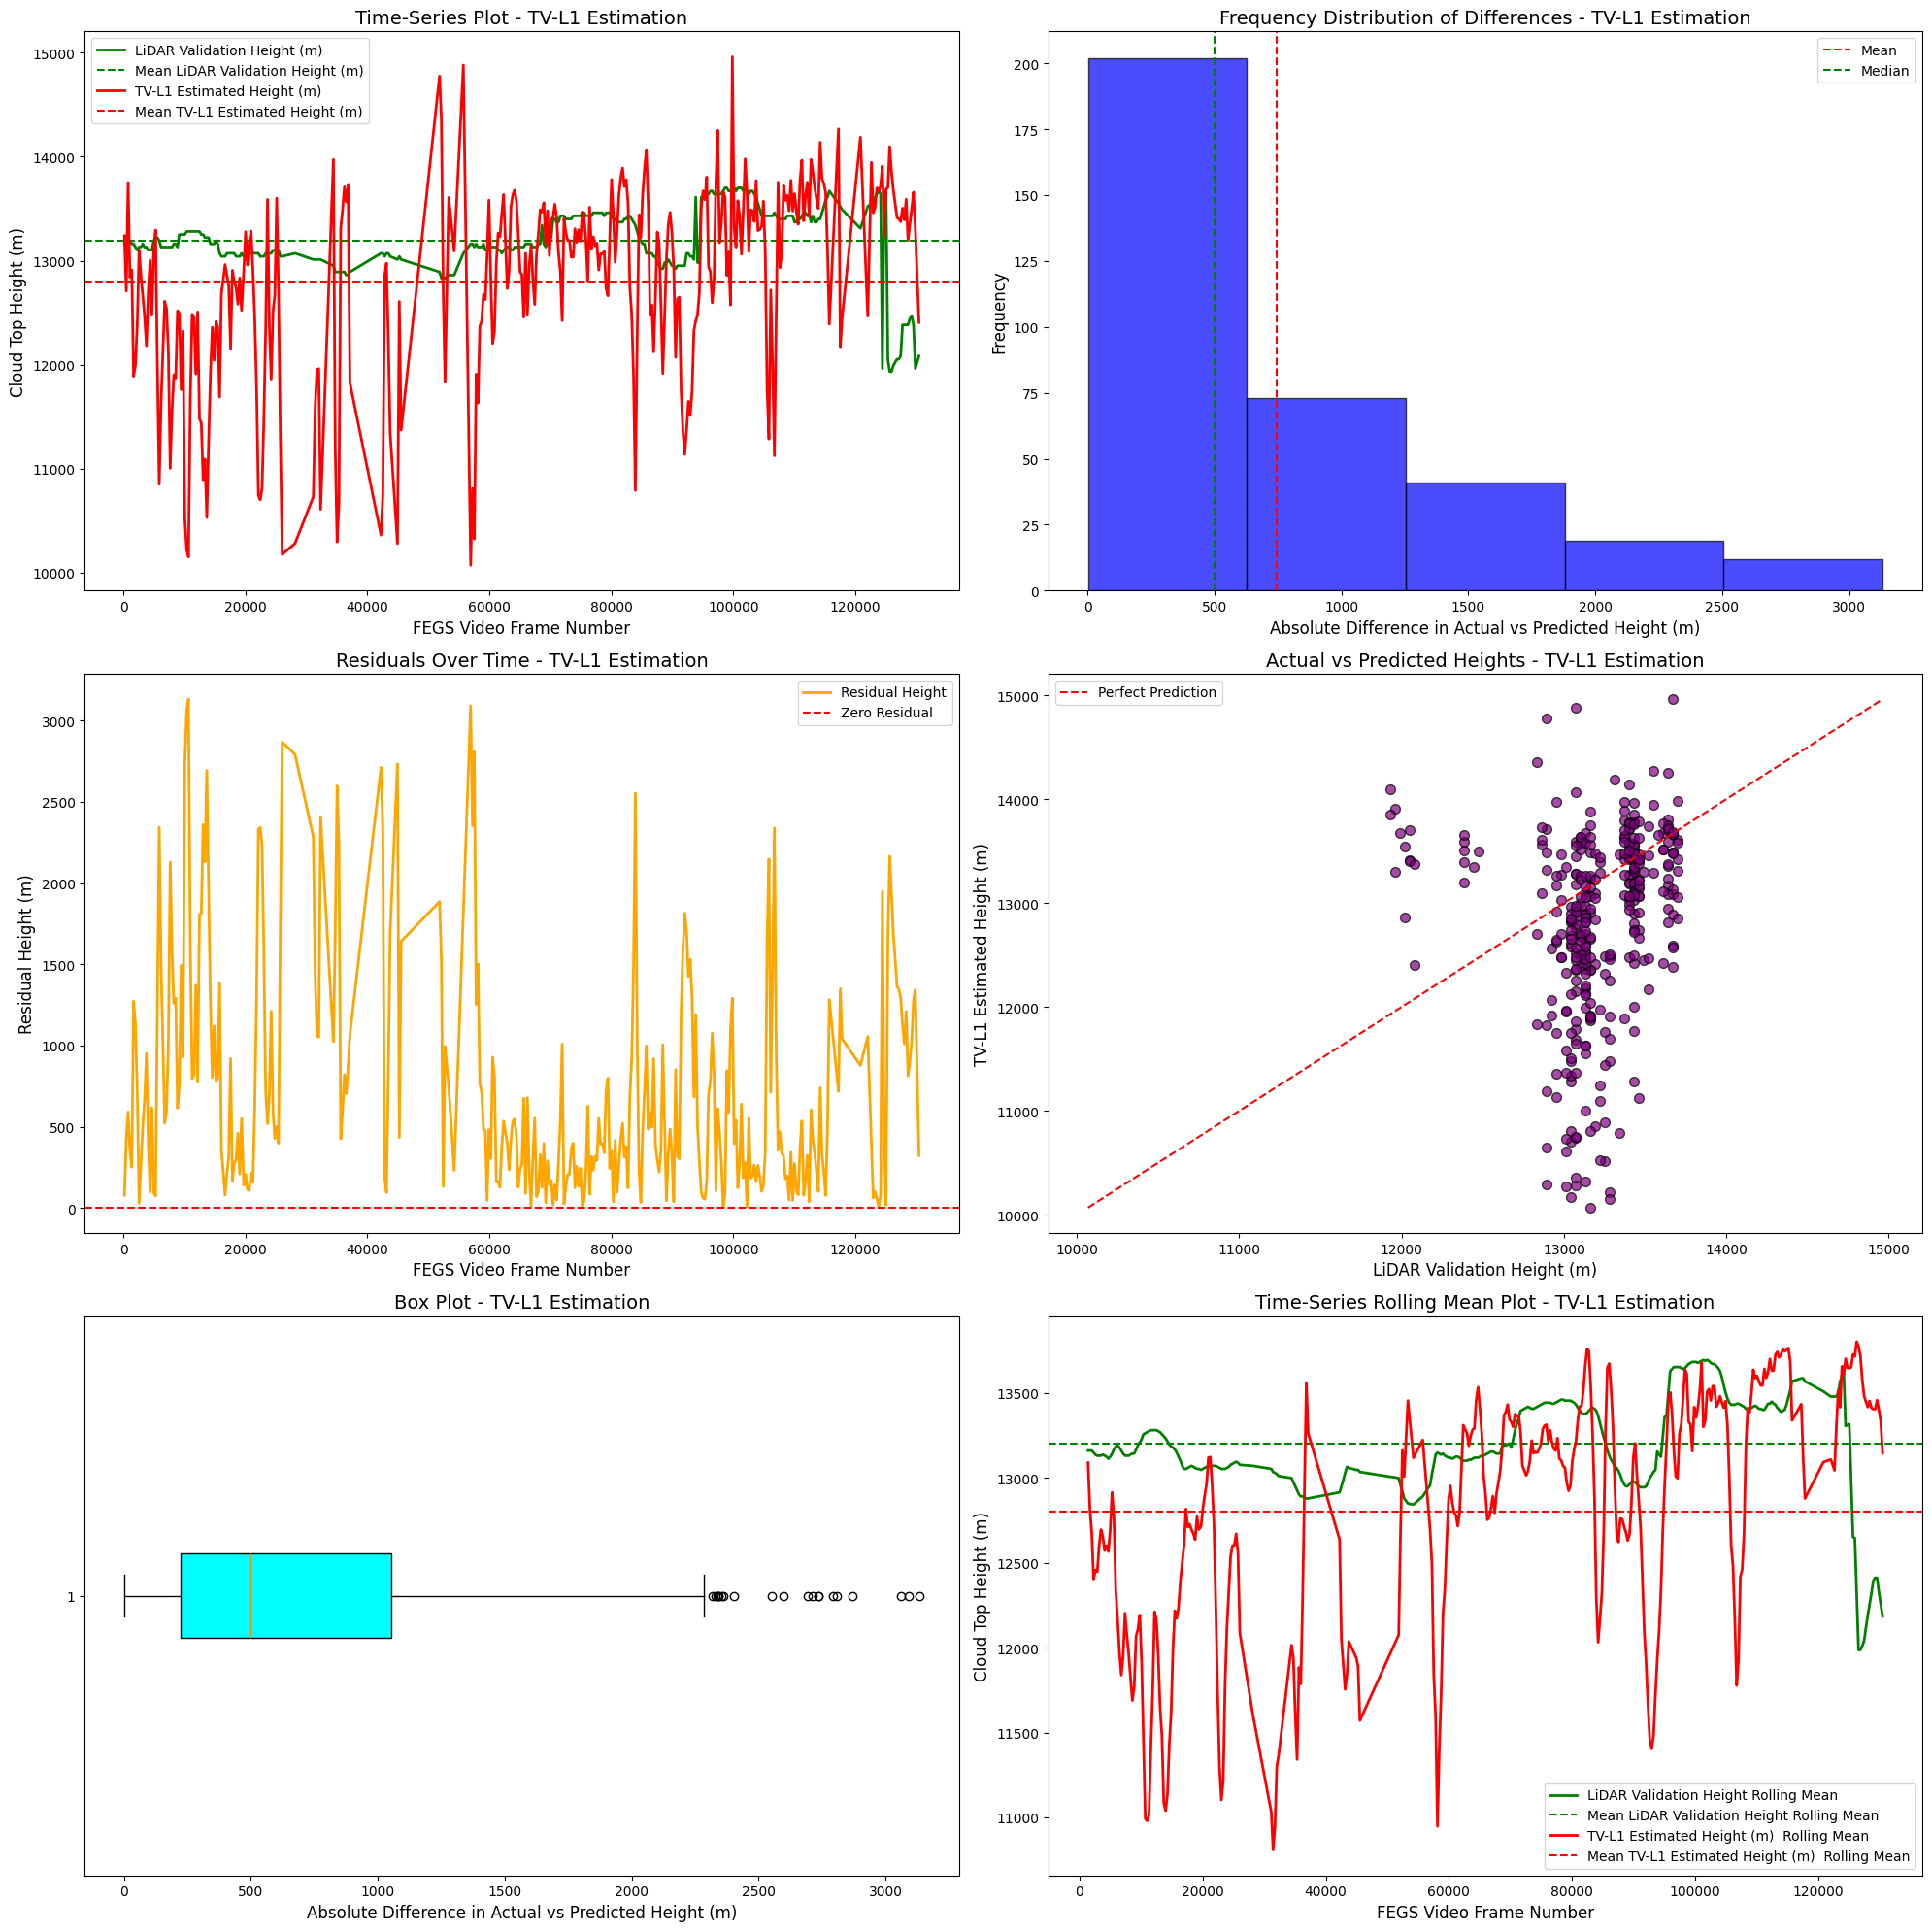

In [ ]:
titles = {
    'ts': 'Time-Series Plot - TV-L1 Estimation',
    'fd': 'Frequency Distribution of Differences - TV-L1 Estimation',
    'res': 'Residuals Over Time - TV-L1 Estimation',
    'scatter': 'Actual vs Predicted Heights - TV-L1 Estimation',
    'box': 'Box Plot - TV-L1 Estimation',
    'rolling': 'Time-Series Rolling Mean Plot - TV-L1 Estimation'
}
create_combined_plot(tvl1_df, titles, 'lidar_tvl1_diff', 'tv_l1_estimation', 'TV-L1 Estimated Height (m)')

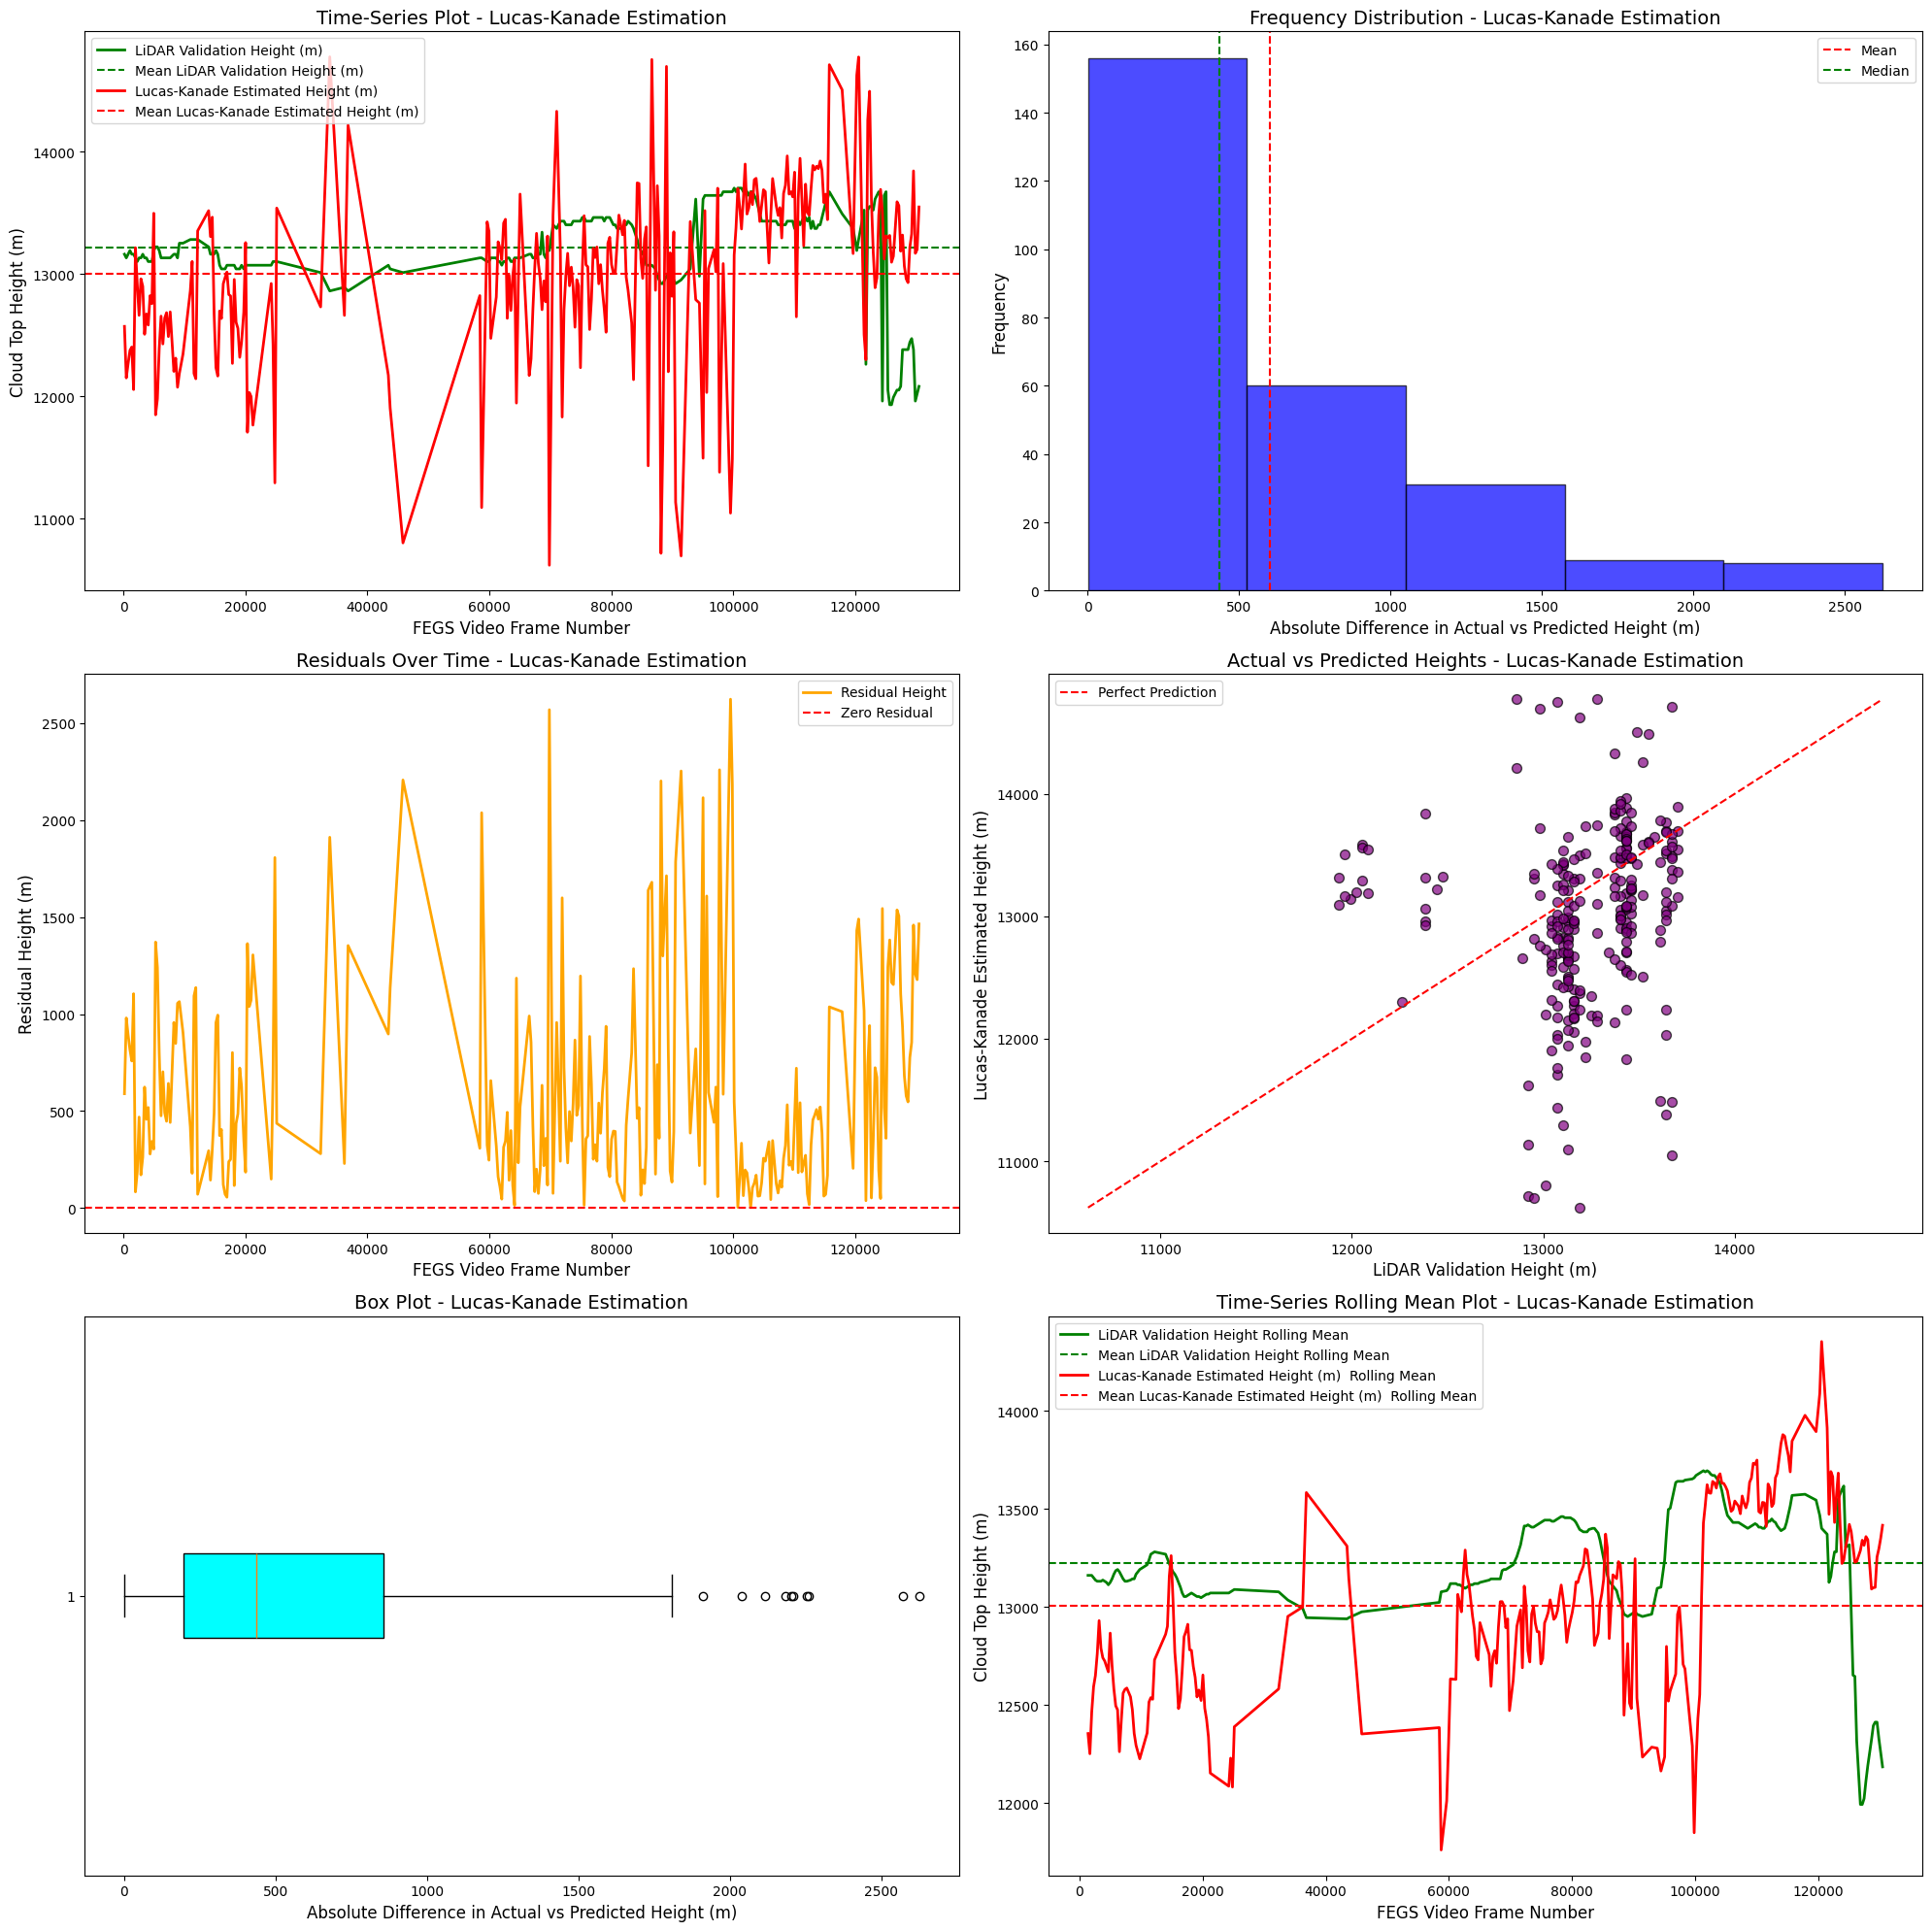

In [ ]:
titles = {
    'ts': 'Time-Series Plot - Lucas-Kanade Estimation',
    'fd': 'Frequency Distribution - Lucas-Kanade Estimation',
    'res': 'Residuals Over Time - Lucas-Kanade Estimation',
    'scatter': 'Actual vs Predicted Heights - Lucas-Kanade Estimation',
    'box': 'Box Plot - Lucas-Kanade Estimation',
    'rolling': 'Time-Series Rolling Mean Plot - Lucas-Kanade Estimation'
}
create_combined_plot(lk_df, titles, 'lidar_lk_diff', 'lk_estimation', 'Lucas-Kanade Estimated Height (m)')

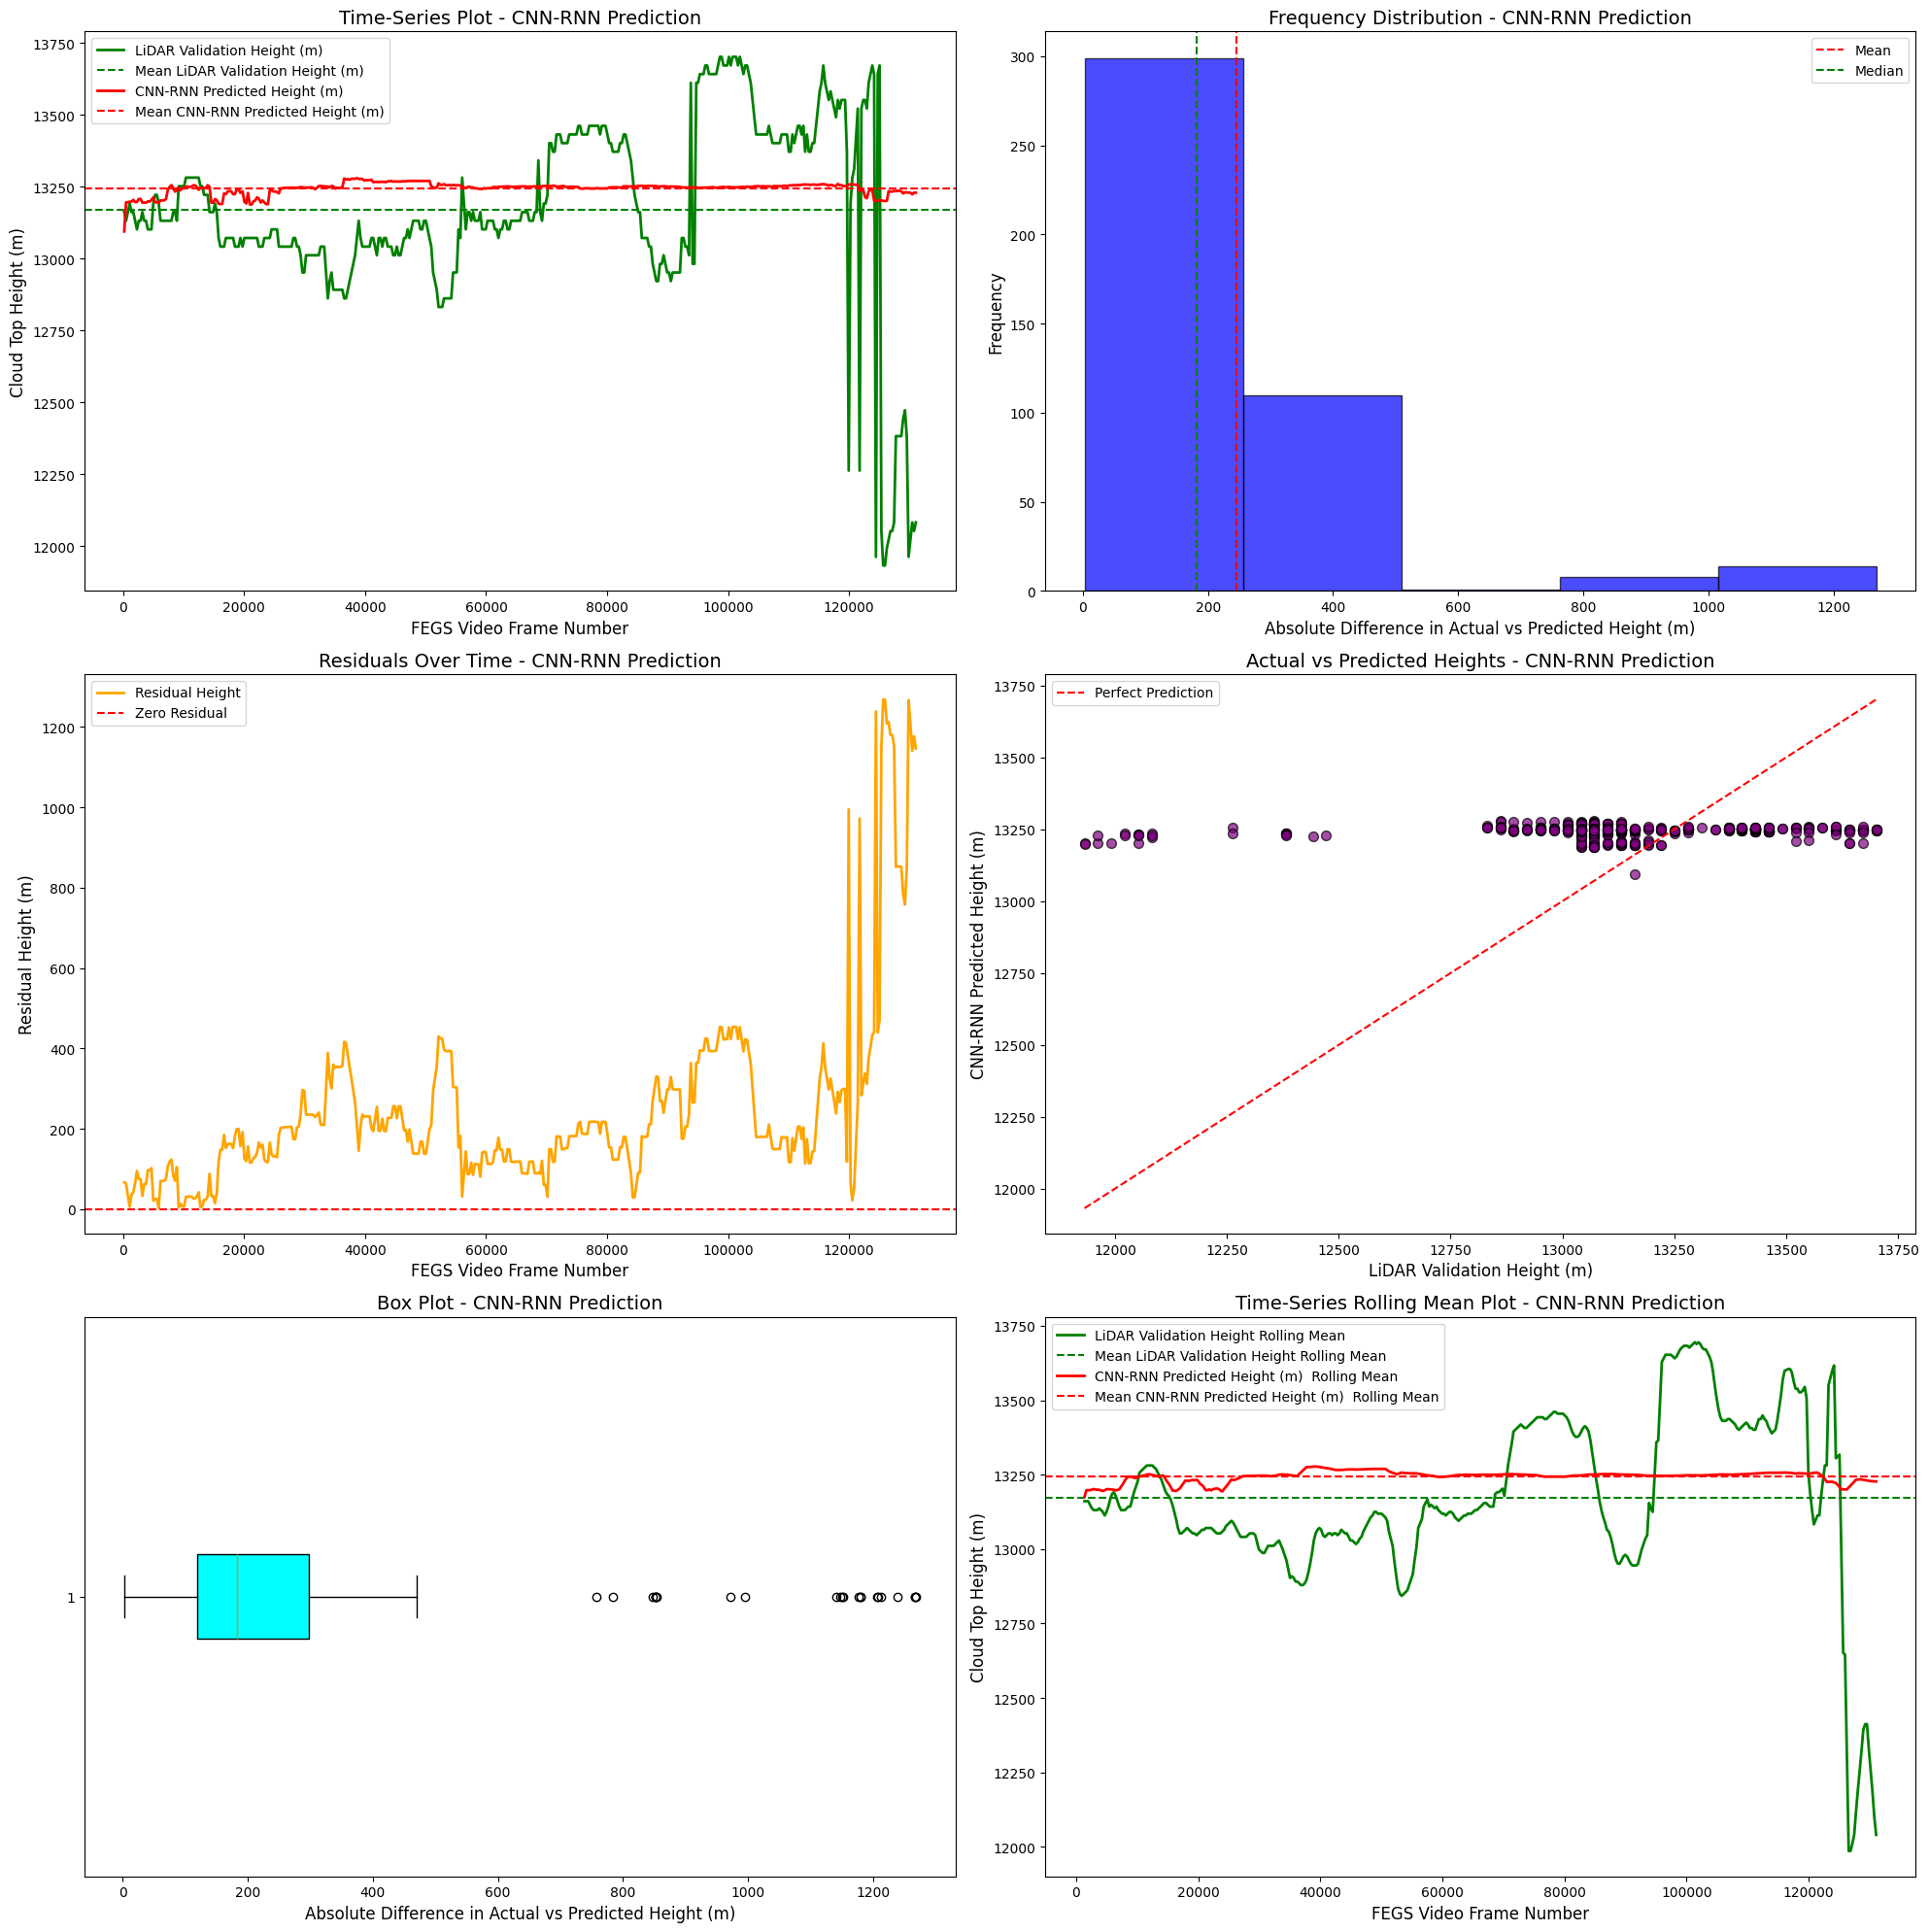

In [ ]:
titles = {
    'ts': 'Time-Series Plot - CNN-RNN Prediction',
    'fd': 'Frequency Distribution - CNN-RNN Prediction',
    'res': 'Residuals Over Time - CNN-RNN Prediction',
    'scatter': 'Actual vs Predicted Heights - CNN-RNN Prediction',
    'box': 'Box Plot - CNN-RNN Prediction',
    'rolling': 'Time-Series Rolling Mean Plot - CNN-RNN Prediction'
}
create_combined_plot(cnn_rnn_df, titles, 'lidar_nn_diff', 'cnn_rnn_prediction', 'CNN-RNN Predicted Height (m)')

In [ ]:
print_error_metrics(df, y='lidar_validation_height', yhat='cnn_rnn_prediction')

Mean Absolute Error (MAE): 245.65
Mean Squared Error (MSE): 111993.18
Root Mean Squared Error (RMSE): 334.65


In [ ]:
print_error_metrics(df_cleaned, y='lidar_validation_height', yhat='tv_l1_estimation')

Mean Absolute Error (MAE): 748.59
Mean Squared Error (MSE): 1060012.92
Root Mean Squared Error (RMSE): 1029.57


In [ ]:
print_error_metrics(df4, y='lidar_validation_height', yhat='lk_estimation')

Mean Absolute Error (MAE): 601.46
Mean Squared Error (MSE): 647928.90
Root Mean Squared Error (RMSE): 804.94


In [ ]:
!pwd

/content/drive/MyDrive/harvard.dce.nasa.cloud2cloud


In [ ]:
%cd capstone_2024/cloud_features_tracking/CNN_RNN/cnn-rnn-results-visualize.ipynb

In [ ]:
# conver notebook to html
!jupyter nbconvert "capstone_2024/cloud_features_tracking/CNN_RNN/cnn-rnn-results-visualize.ipynb" --to html

[NbConvertApp] Converting notebook capstone_2024/cloud_features_tracking/CNN_RNN/cnn-rnn-results-visualize.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 19 image(s).
[NbConvertApp] Writing 2015763 bytes to capstone_2024/cloud_features_tracking/CNN_RNN/cnn-rnn-results-visualize.html
